# 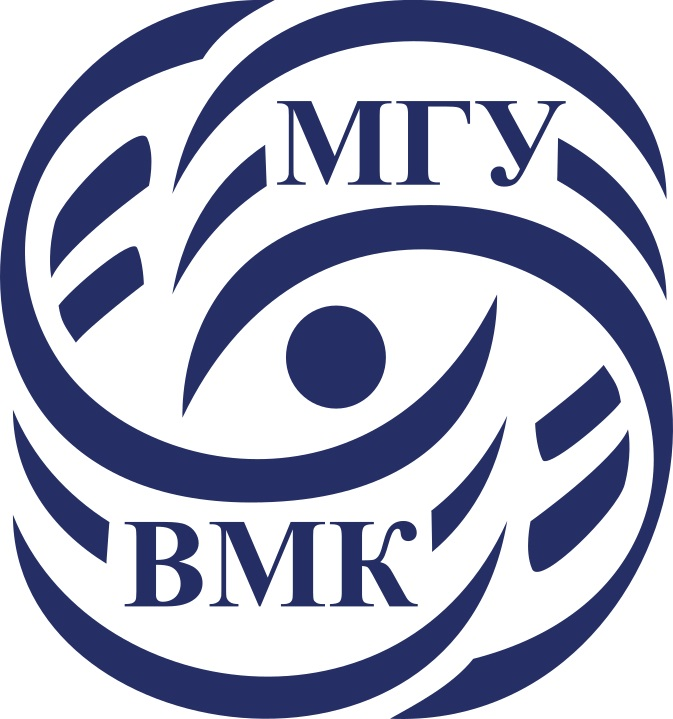

# Машинное обучение. ВМК МГУ

# Практическое задание 12: Кластеризация. Методы снижения размерности.





## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







__В этом задании вы..:__

* Познакомитесь с одним способом визуализации процесса обучения
* Сравните между собой результаты разных способов кластеризации
* Посмотрите и реализуете несколько метрик качества кластеризации
* Попробуете разные методы снижения размерности

----

<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

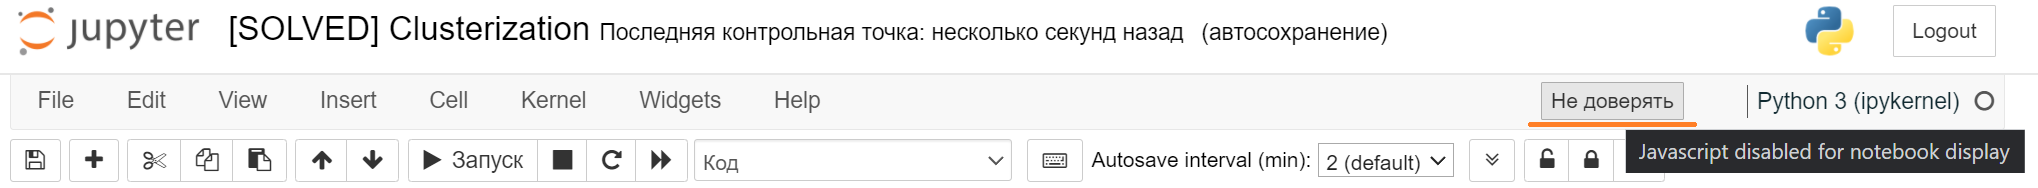

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

Обратите внимание, что установка `torch` и `tensorflow` через `pip `может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении

In [2]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
! pip install -r /content/requirements_2024_25_for_colab_full.txt

Downloading...
From: https://drive.google.com/uc?id=19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
To: /content/requirements_2024_25_for_colab_full.txt
100% 424/424 [00:00<00:00, 1.61MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# <font color='DarkOrange'>0. Введение. [1 балл]</font>

## 0.1 О задании

В данной работе вам предстоит познакомится с методами машинного обучения без учителя — кластеризацией и алгоритмами снижения размерности.

 Рекомендуется использовать Kaggle так как в нём корректно работают интерактивные визуализации.

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [3]:
import os

import gdown

import scipy

import numpy as np

import tqdm.auto as tqdm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from ipywidgets import interactive, fixed, interact_manual, IntSlider, FloatLogSlider, FloatSlider

import torch
from torchvision.datasets import CIFAR10

# Необходима преварительная установка tensorflow
from keras.applications.inception_v3 import InceptionV3, preprocess_input

import sklearn

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Библиотека umap-learn, а не umap
from umap import UMAP
from sklearn.manifold import TSNE, Isomap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## <font color='DarkOrange'>0.3 Введение в интерактивные графики jupyter notebook [кросспроверка 1 балл]</font>

Информация об особенностях интерактивных графиков вынесена в отдельный ноутбук `Deep dive into .ipynb.ipynb`. **Ознакомьтесь с ним перед дальнейшим выполнением задания!**

#### **Задание 0.0 [кросспроверка, 1 балл][код, вопрос]**
* Поиграйтесь с интерактивными графиками.
* Посмотрите в чём заключается смысл функций [`interactive`, `interact_manual`, `fixed`, `IntSlider`, `FloatLogSlider`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
* Какие ещё [слайдеры и динамические виджеты бывают](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)?
* Как вам кажется, удобный ли это инструмент?
* Предложите несколько примеров, когда он мог бы ещё пригодиться.

In [17]:
# Ваш код здесь:

def exp_plot(base=2.0, coeff=1.0, shift=0):
    x = np.linspace(-5, 5, 400)
    y = coeff * np.power(base, x + shift)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'${coeff}·{base}^{{x+{shift}}}$', color='darkorange')
    plt.title('Экспоненциальная функция')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.yscale('log') #добавили логарифм-ую шкалу
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.show()

interactive_plot1 = interactive(
    exp_plot,
    base=FloatLogSlider(value=2, min=-1, max=2, step=0.1, base=10, description='Основание'),
    coeff=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Коэффициент'),
    shift=IntSlider(value=0, min=-3, max=3, description='Сдвиг')
)

display(interactive_plot1) #будет прямая линия, так и должно быть! см. на оси

#-------

def wave_plot(func_type='sin', frequency=1.0, damping=0.0):
    x = np.linspace(0, 4*np.pi, 200)
    if func_type == 'sin':
        y = np.sin(frequency*x) * np.exp(-damping*x)
    else:
        y = np.cos(frequency*x) * np.exp(-damping*x)

    plt.figure(figsize=(10,6))
    plt.plot(x, y, label=f'Затухающая {func_type} (ξ={damping})')
    plt.title('Колебания с затуханием')
    plt.xlabel('Время')
    plt.ylabel('Амплитуда')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.show()

interactive_plot2 = interactive(
    wave_plot,
    func_type=['sin', 'cos'],
    frequency=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1),
    damping=FloatSlider(value=0.0, min=0.0, max=0.5, step=0.01)
)

display(interactive_plot2)

interactive(children=(FloatLogSlider(value=2.0, description='Основание', max=2.0, min=-1.0), FloatSlider(value…

interactive(children=(Dropdown(description='func_type', options=('sin', 'cos'), value='sin'), FloatSlider(valu…

<font color='MediumOrchid'>**Ваш ответ здесь:**

*Виджеты: ToggleButtons, SelectionSlider, CheckBox.*
Может быть полезно для визуального сравнения различных алгоритмов; подбора параметров для визуализации данных; демонстрации регуляризации в моделях и т.д.Например, с помощью interactive можно создать слайдер для выбора числа соседей в k-NN и визуально наблюдать изменение границы классификации.

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>**

In [18]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## 0.4 Ещё несколько важных замечаний

При выполнении задания запрещено:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>1. Кластеризация на синтетических данных. [кросспроверка 5 балла,  unittests 4 балла]</font>

В данной части мы рассмотрим несколько наборов синтетических данных и сравним как разные алгоритмы кластеризации ведут себя в низкоразмерных и высокоразмерных пространствах

## a. Двумерные данные

Сгенерируем двумерные данные с $4$ естественными кластерами разного размера и плотности.

In [19]:
data_moons, labels_moons = make_moons(n_samples=300, shuffle=True, noise=0.09, random_state=6417)
data_moons, labels_moons = data_moons[labels_moons == 0], labels_moons[labels_moons == 0]

data_blobs, labels_blobs = make_blobs(
    n_samples=500, n_features=2, centers=[(0, -0.2), (-1.5, -1.5), (-1.5, 1.5)],
    cluster_std=[0.2, 0.4, 0.6], center_box=(-10.0, 10.0),
    shuffle=True, random_state=6417, return_centers=False
)

data = np.concatenate([data_moons, data_blobs])
labels = np.concatenate([labels_moons, labels_blobs + 1])

Определим вспомогательную функцию для отрисовки двумерных кластеризованных данных. При выполенении задания желательно пользоваться этой функцией для визуализации. При необходимости можете менять сигнатуру и поведение функции как вам удобно, _оставляя стиль отрисовки в целом неизменным_.

In [20]:
def plot_2d_data(data, labels, title='Исходные данные', cmap='tab20', ax=None):
    '''
    Отрисовка 2d scatter plot.
    :param np.ndarray data: 2d массив точек
    :param Union[list, np.ndarray] labels: список меток для каждой точки выборки
    :param str title: Заголовок графика
    :param str cmap: Цветовая палитра
    :param ax Optional[matplotlib.axes.Axes]: Оси для отрисовки графика.
        Если оси не заданы, то создаётся новая фигура и сразу же происходит её отрисовка
        Иначе, график добавляется на существуюущие оси. Отрисовки фигуры не происходит
    '''
    n_clusters = len(np.unique(labels))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig = None

    scatter = ax.scatter(
        data[:, 0], data[:, 1], c=labels,
        cmap=plt.get_cmap(cmap, n_clusters)
    )

    cbar = plt.colorbar(scatter, label='Номер кластера', ax=ax)
    cbar.set_ticks(np.min(labels) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
    cbar.set_ticklabels(np.unique(labels))

    ax.set_title(title)
    ax.grid(True)

    if fig is not None:
        fig.tight_layout()
        plt.show()

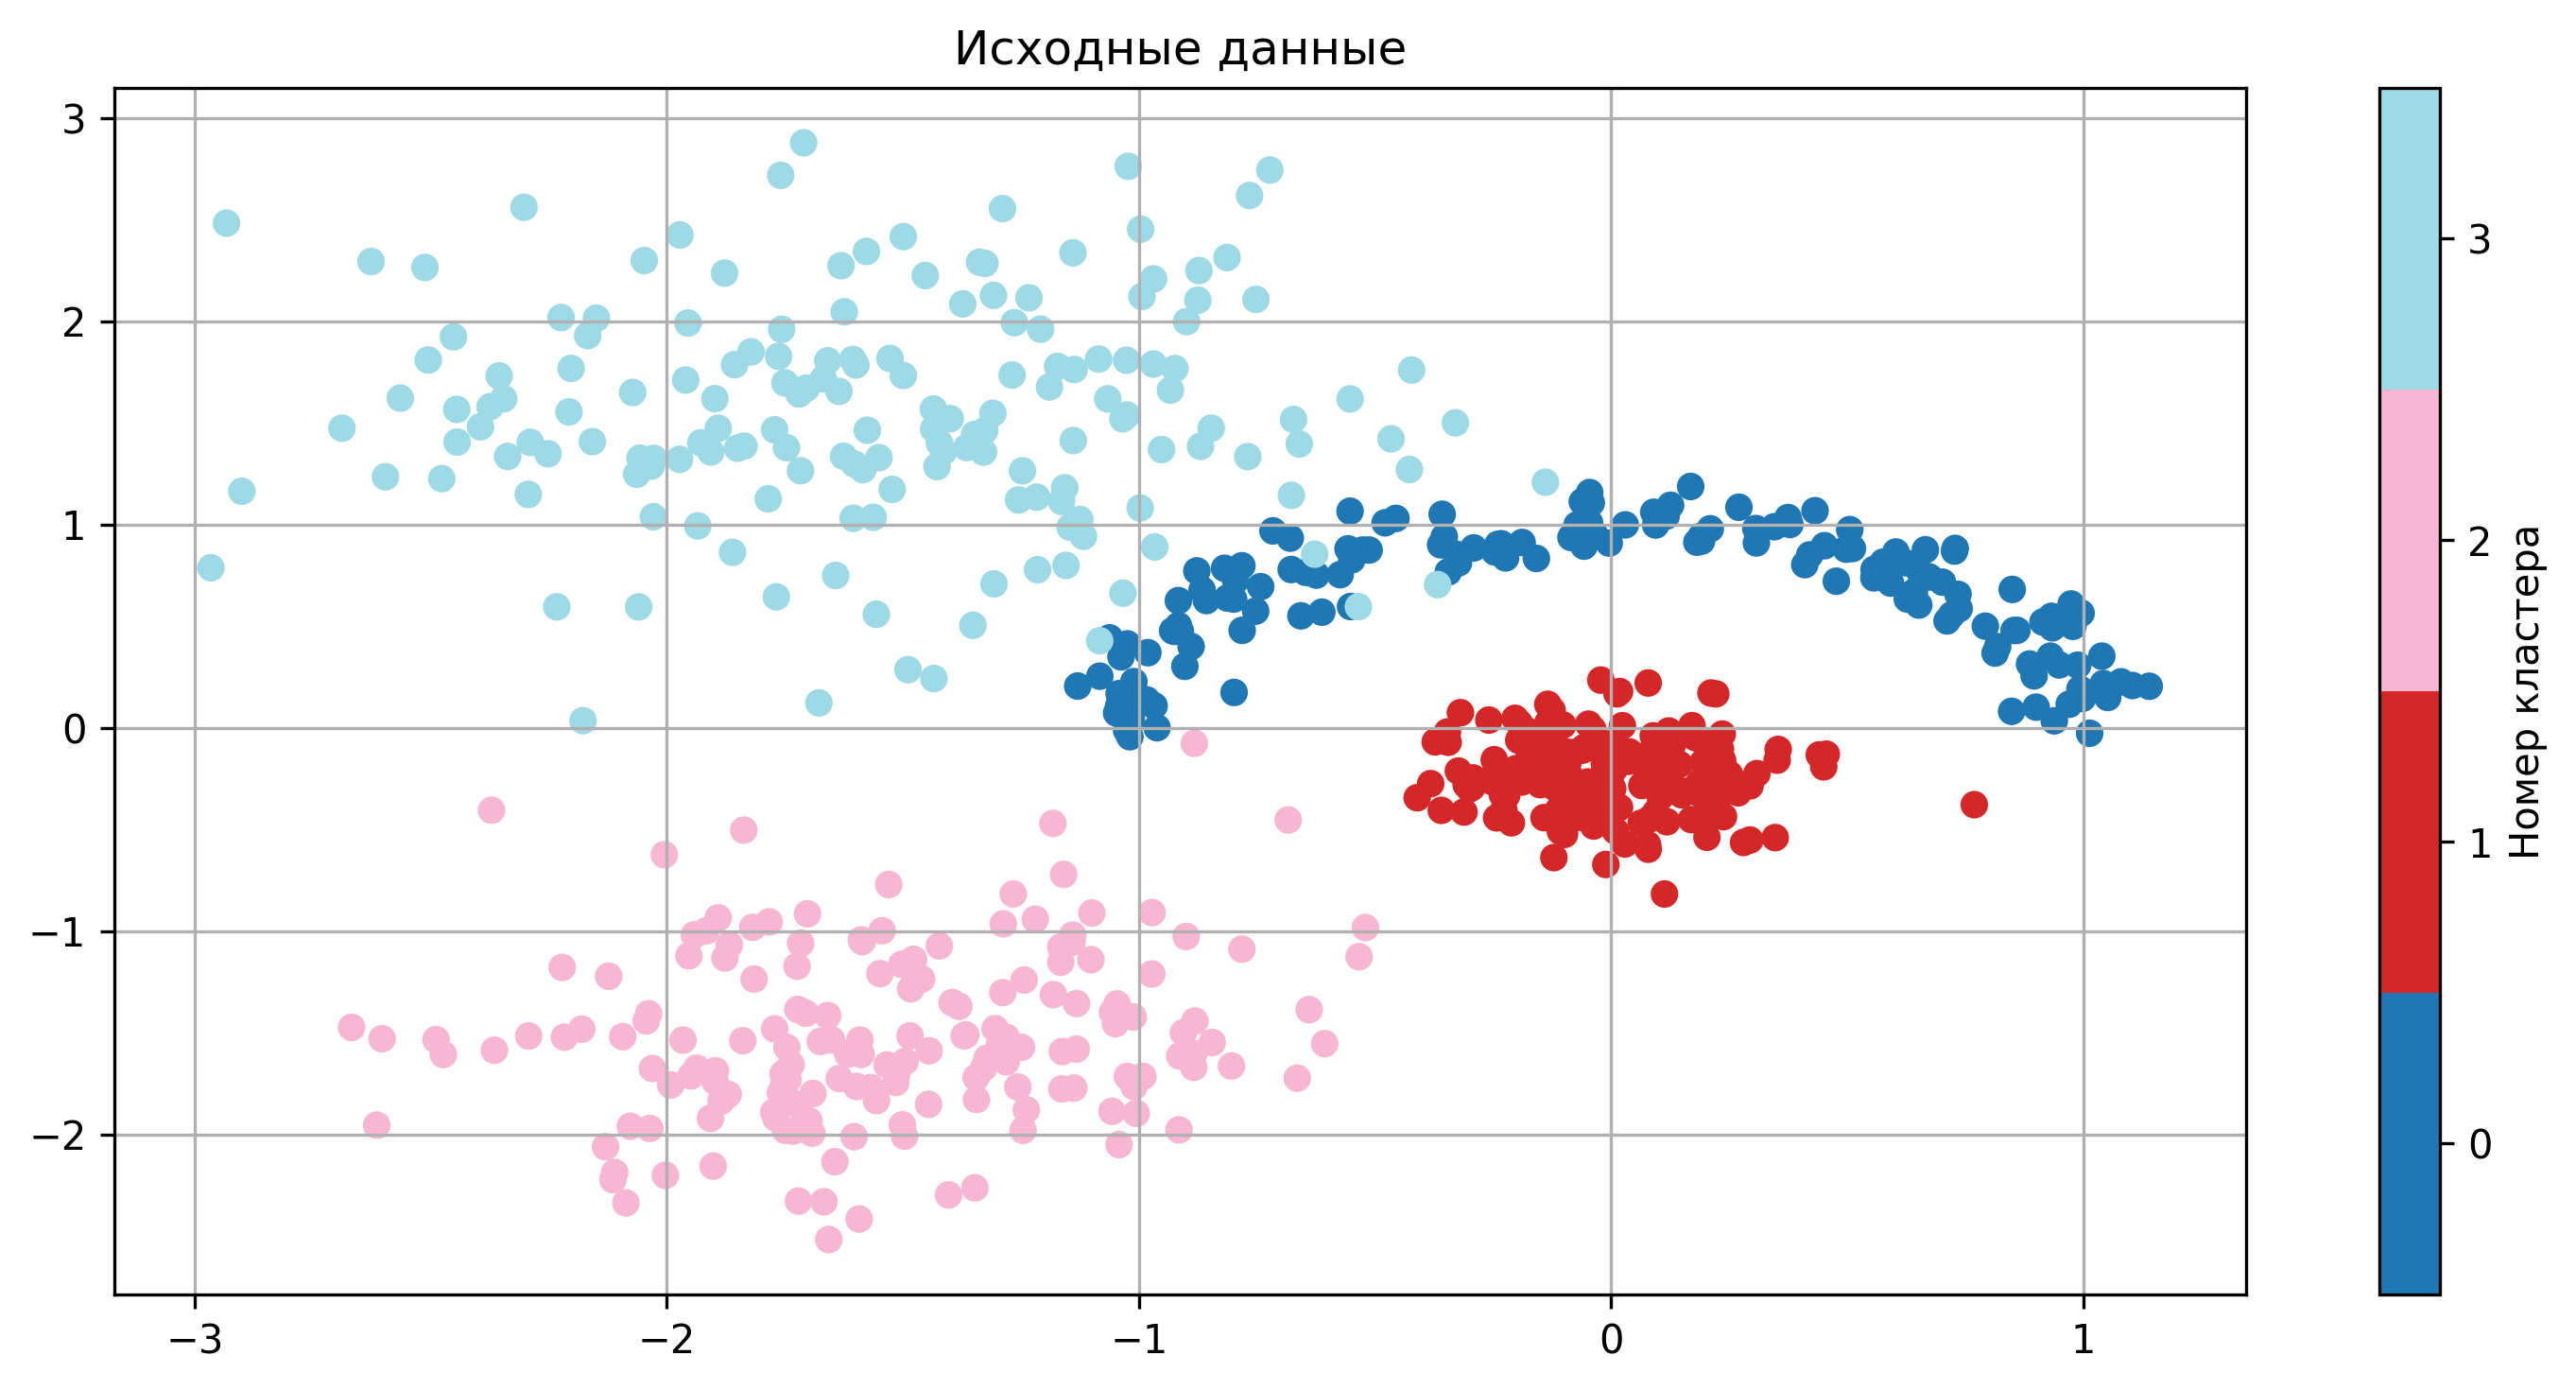

In [21]:
plot_2d_data(data, labels, title='Исходные данные', cmap='tab20')

#### <font color='DarkOrange'>**Задание 1.a.1 [кросспроверка, 1 балл][код]** </font>
<a id='task_1.a.1'></a>
Запустите следующие алгоритмы кластеризации на данной выборке: `KMeans`, `DBSCAN`, `AgglomerativeClustering`. Визуально подберите наилучшие параметры для этих алгоритмов (`n_clusters`, `eps`, `min_samples`, `linkage`). Изобразите наилучшие получившиеся разбиения на графиках.

<font color='LightSteelBlue'>**Советы**</font>
1. Можете использовать виджеты для ручного подбора параметров
2. Используйте `plot_2d_data` для отрисовки графиков. Обязательно меняйте заголовок
3. **<font color='OrangeRed'>Помните, динамический контент может не сохраняться в ноутбуке. Поэтому после подбора оптимальных параметров нарисуйте соответствующий рисунок в статическом режиме</font>**

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


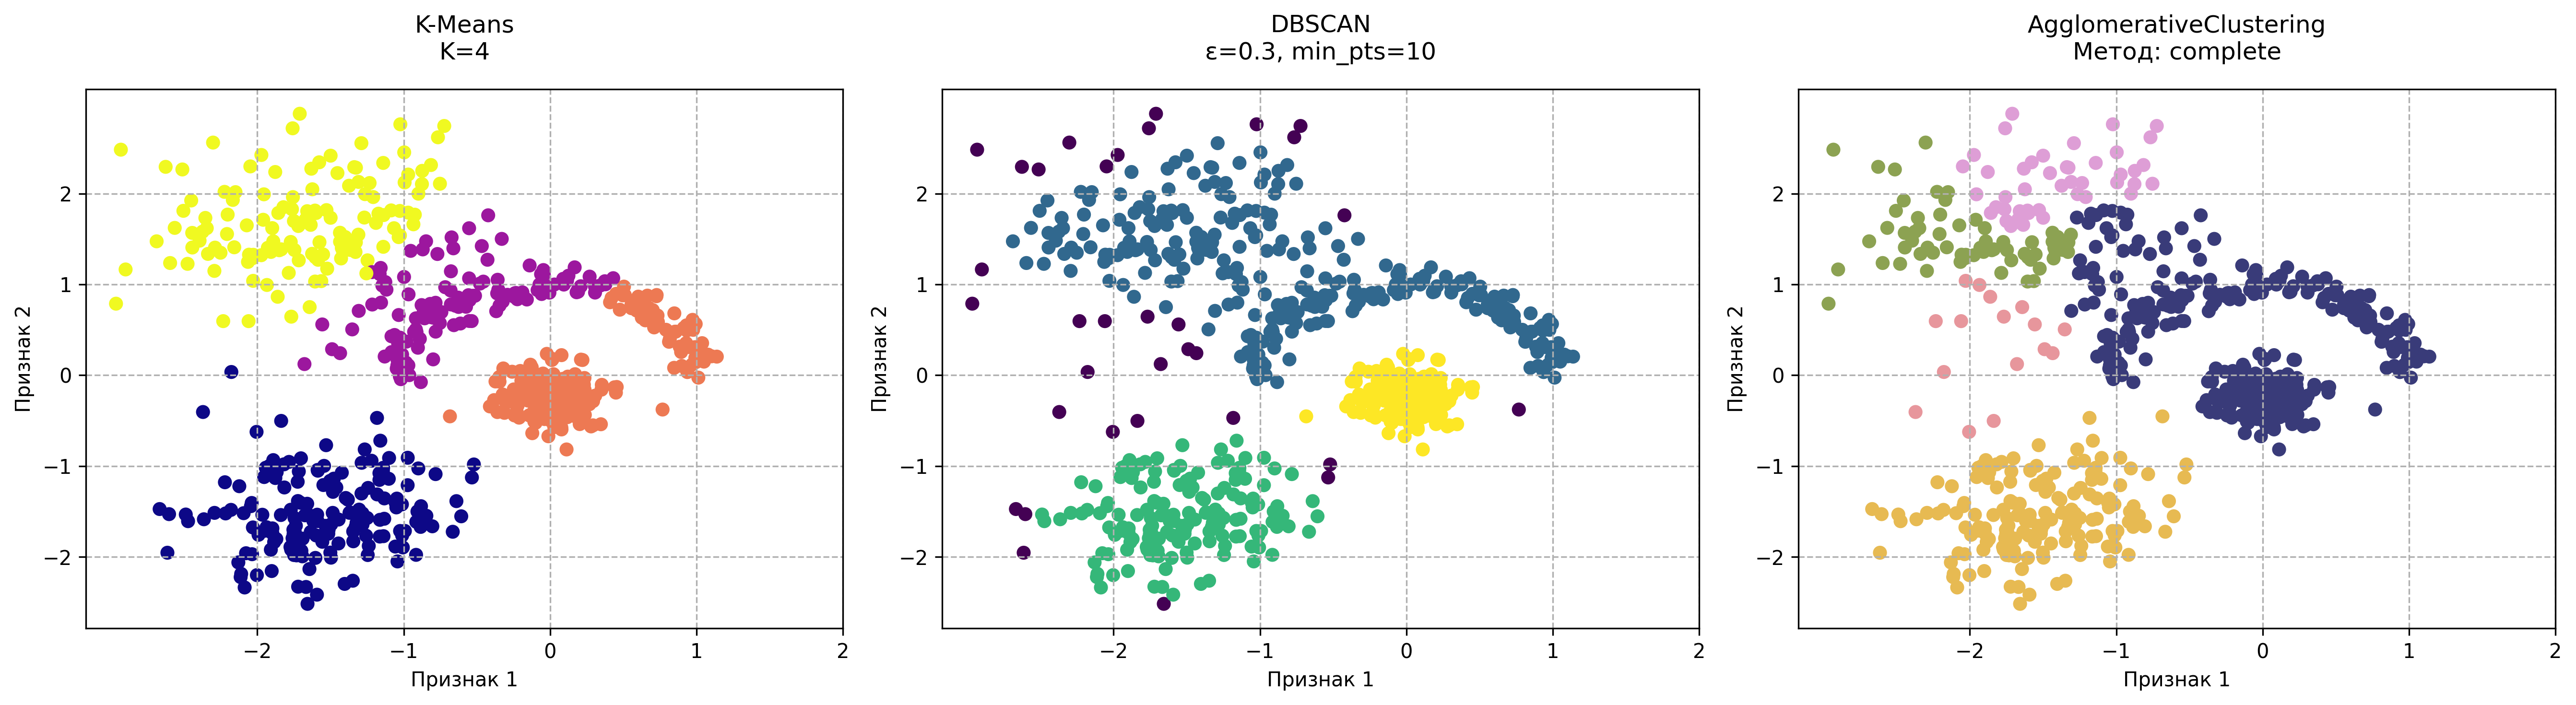

In [26]:
# Ваш код здесь:

#K-Means
def tune_kmeans(num_clusters):
    model = KMeans(n_clusters=num_clusters, init='random', n_init='auto', random_state=42)
    plot_2d_data(
        data,
        model.fit_predict(data),
        title=f'K-Means Clustering (K={num_clusters})',
        cmap='plasma',
        marker_size=40
    )

kmeans_widget = interactive(
    tune_kmeans,
    num_clusters=IntSlider(value=5, min=2, max=12, step=1,
                          description='Количество кластеров')
)
kmeans_widget


# DBSCAN
def tune_dbscan(epsilon, core_samples):
    model = DBSCAN(eps=epsilon, min_samples=core_samples)
    labels = model.fit_predict(data)
    plt.figure(figsize=(9, 7))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis',
               s=50, edgecolor='k', alpha=0.8)
    plt.title(f'DBSCAN: ε={epsilon}, min_pts={core_samples}\n', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.colorbar(label='Метка кластера')
    plt.tight_layout()
    plt.show()
dbscan_widget = interactive(
    tune_dbscan,
    epsilon=FloatSlider(value=0.35, min=0.1, max=1.2, step=0.02,
                       description='Радиус ε'),
    core_samples=IntSlider(value=8, min=3, max=25, step=1,
                          description='Минимум точек')
)
dbscan_widget

#  AgglomerativeClustering
def tune_agglomerative(clusters, link_method):
    model = AgglomerativeClustering(
        n_clusters=clusters,
        linkage=link_method
    )
    plot_2d_data(
        data,
        model.fit_predict(data),
        title=f'AgglomerativeClustering\nМетод связи: {link_method}',
        cmap='tab20b',
        marker_shape='s'
    )

agglomerative_widget = interactive(
    tune_agglomerative,
    clusters=IntSlider(value=6, min=2, max=15, description='Кластеры'),
    link_method=['ward', 'complete', 'average', 'single']
)
agglomerative_widget




# резы
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
kmeans_final = KMeans(n_clusters=4, random_state=42).fit(data)
axs[0].scatter(data[:, 0], data[:, 1], c=kmeans_final.labels_, cmap='plasma')
axs[0].set_title('K-Means\nK=4', pad=15)
axs[0].grid(True, linestyle='--')

# DBSCAN
dbscan_final = DBSCAN(eps=0.3, min_samples=10).fit(data)
axs[1].scatter(data[:, 0], data[:, 1], c=dbscan_final.labels_, cmap='viridis')
axs[1].set_title('DBSCAN\nε=0.3, min_pts=10', pad=15)
axs[1].grid(True, linestyle='--')

#  AgglomerativeClustering
agg_final = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(data)
axs[2].scatter(data[:, 0], data[:, 1], c=agg_final.labels_, cmap='tab20b')
axs[2].set_title('AgglomerativeClustering\nМетод: complete', pad=15)
axs[2].grid(True, linestyle='--')

for ax in axs:
    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')
    ax.set_xticks(np.linspace(-2, 2, 5))
    ax.set_yticks(np.linspace(-2, 2, 5))

plt.tight_layout()
plt.show()

#### <font color='DarkOrange'>**Задание 1.a.2 [кросспроверка, 0.5 балла][вопрос]**</font>
Основываясь на знании о работе данных алгоритмов, объясните, почему кластеры были сформированы таким образом. Какой алгоритм лучше всего работает на предложенных данных?

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Лучше всего справился **DBSCAN**: он хорошо выделил кластеры и достаточно точно пометил шумовые точки; он более адаптирован к данным с несферическими кластерами. DBSCAN группирует точки на основе их плотности. KMeans пытается разделить данные на 4 кластера, минимизируя внутрикластерное расстояние, и по итогу не очень справился из-за сложной неравномерной структуры данных. AgglomerativeClustering чувствителен к выбору метода linkage и параметров.

## b. Многомерные данные. Снижение размерности

Теперь попробуем кластеризовать данные в высокоразмерном пространстве. Существенным отличием от двумерного случая является невозможность прямой визуальной оценки кластеризации.

Одним из наглядных способов оценки кластеризации является снижение размерности. В данной части вам предлагается использовать алгоритм `TSNE` для визуализации данных.

<font color='CornflowerBlue'>**t-SNE (t-распределенное стохастическое вложение соседей)**</font> — это алгоритм используемый для сокращения размерности данных, а также для визуализации многомерных данных в 2D или 3D, сохраняя их «структуру». Он фокусируется на том, чтобы близкие точки в исходном пространстве оставались близкими в новом, а далёкие — не обязательно. Для этого t-SNE моделирует сходство между точками в высоком измерении (через условные вероятности) и в низком (через распределение Стьюдента), затем итеративно подгоняет проекции, минимизируя разницу между этими сходствами. В итоге кластеры или локальные паттерны становятся видимыми, но абсолютные расстояния и глобальная структура могут искажаться. Алгоритм полезен для исследования данных, но требует осторожности в интерпретации.

In [27]:
data, labels = make_classification(
    n_samples=1000, n_features=200, n_informative=100,
    n_repeated=0, n_classes=5, n_clusters_per_class=2, weights=None,
    flip_y=0.01, class_sep=2.5, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=6417
)

####<font color='DarkOrange'>**Задание 1.b.1 [кросспроверка, 0.5 балла][код, вопрос]**</font>
Примените алгоритм `TSNE` для снижения размерности до двух. Учтите, что `TSNE` суть есть метрический алгоритм и существенно зависит от масштаба признаков — некорректный и различающийся масштаб признаков гарантированно приведёт к неинтерпретируемым результатам. Можете попробовать подобрать гиперпараметры алгоритма для получения лучшей визуализации.

Изобразите получившиеся низкоразмерные вектора. Получилось ли сохранить кластеры при переходе в низкоразмерное пространство?

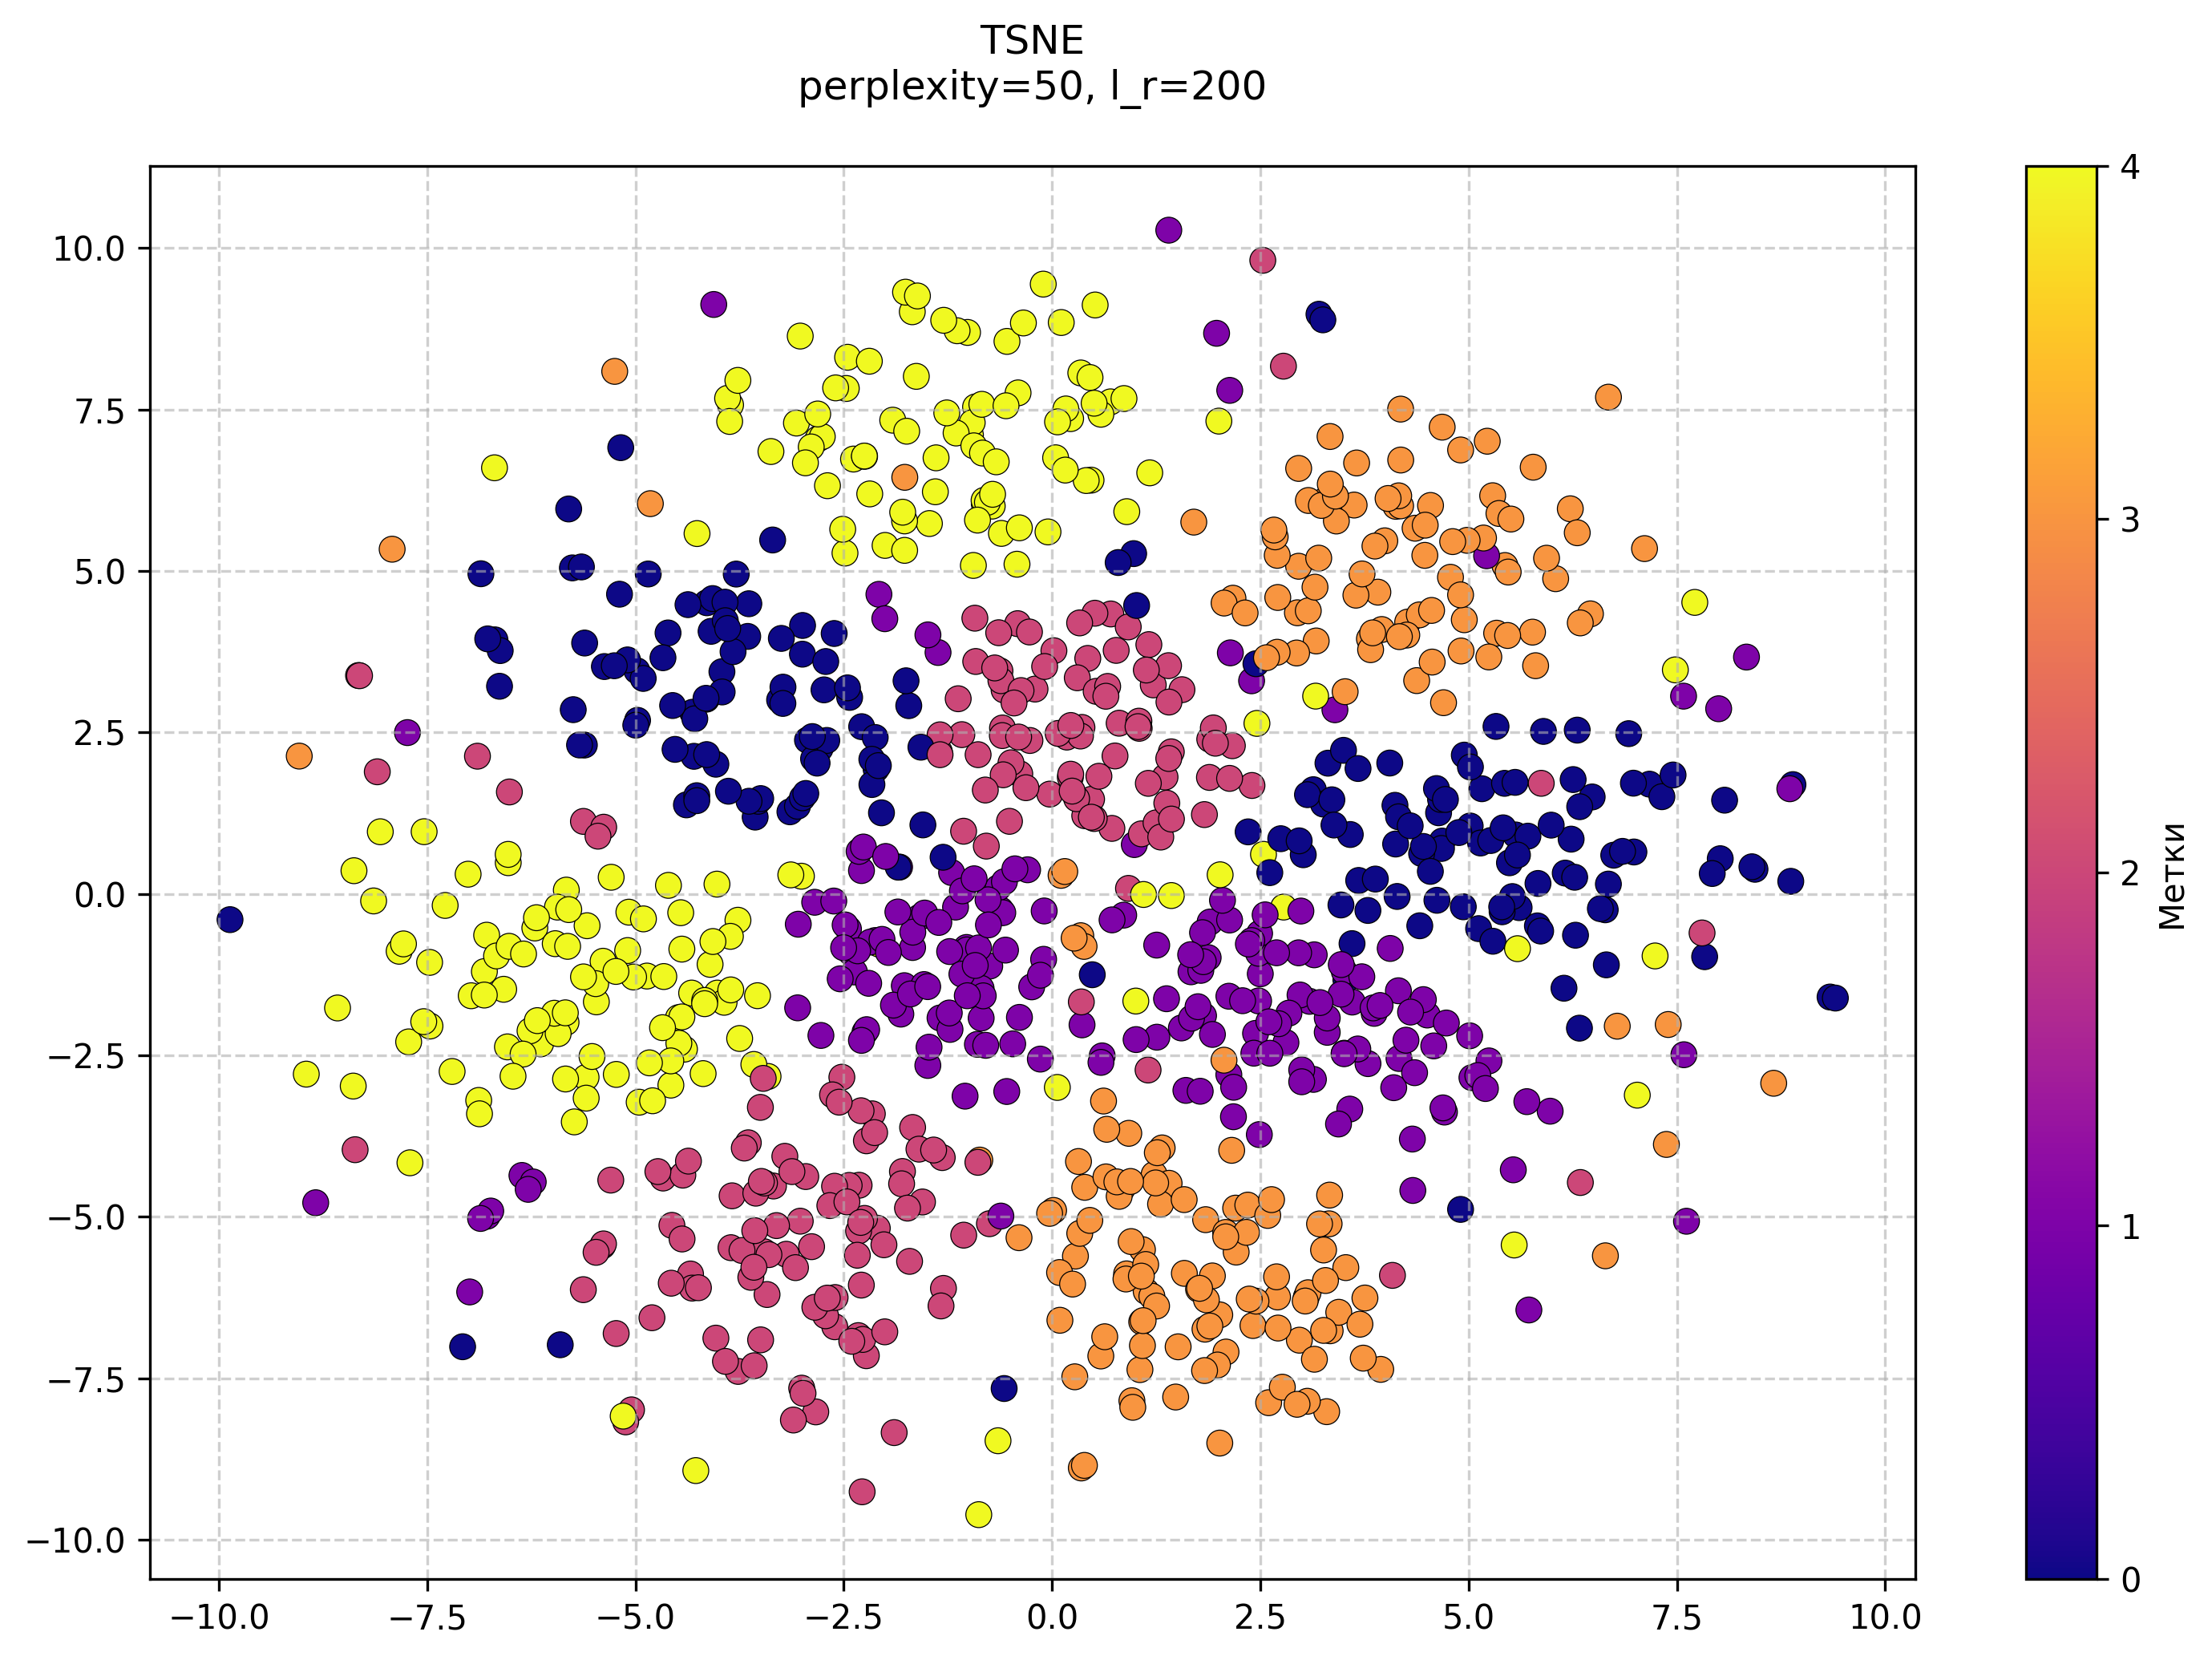

In [39]:
def tsne_visualization(perplex):
    scaler = MinMaxScaler().fit(data)
    data_norm = scaler.transform(data)

    tsne = TSNE(n_components=2, perplexity=perplex,
               learning_rate=150, random_state=42)
    proj = tsne.fit_transform(data_norm)

    plt.figure(figsize=(9, 6))
    plt.scatter(proj[:, 0], proj[:, 1], c=labels,
               cmap='viridis', s=45, alpha=0.8)
    plt.title(f't-SNE проекция (perplexity={perplex})', pad=15)
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.colorbar(label='Классы')
    plt.axis('equal')
    plt.show()

interactive(
    tsne_visualization,
    perplex=IntSlider(value=35, min=5, max=150, step=5,
                     description='Перплексия')
)


best_tsne = TSNE(n_components=2, perplexity=50,
                learning_rate=200, random_state=42)
tsne_proj = best_tsne.fit_transform(MinMaxScaler().fit_transform(data))
plt.figure(figsize=(10, 7))
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=labels,
           cmap='plasma', s=60, edgecolor='k', linewidth=0.3)
plt.title('TSNE\nperplexity=50, l_r=200', pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(label='Метки', ticks=np.unique(labels))
plt.tight_layout()
plt.show()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Нет, не получилось. Как можно видеть, при TSNE кластеры хоть и сгруппированы, но отдалены друг от друга.

#### <font color='DarkOrange'>**Задание 1.b.2 [кросспроверка, 0.5 балла][код]**</font>
Примените алгоритмы кластеризации из предыдущего пункта к новым данным. Изобразите получившиеся кластеры в векторном пространстве, полученном с помощью `TSNE`. Не забудьте подобрать оптимальные параметры (те же, что и в пункте [**1.a.1**](#task_1.a.1)) для всех алгоритмов. Помните, что большинство алгоритмов кластеризации также являются метрическими и существенно зависят от масштаба признаков.

<font color='OrangeRed'>**Замечание:**</font> Обратите внимание, что применять алгоритмы кластеризации нужно к высокоразмерным векторам, а низкоразмерные вектора необходимо использовать только для визуализации.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


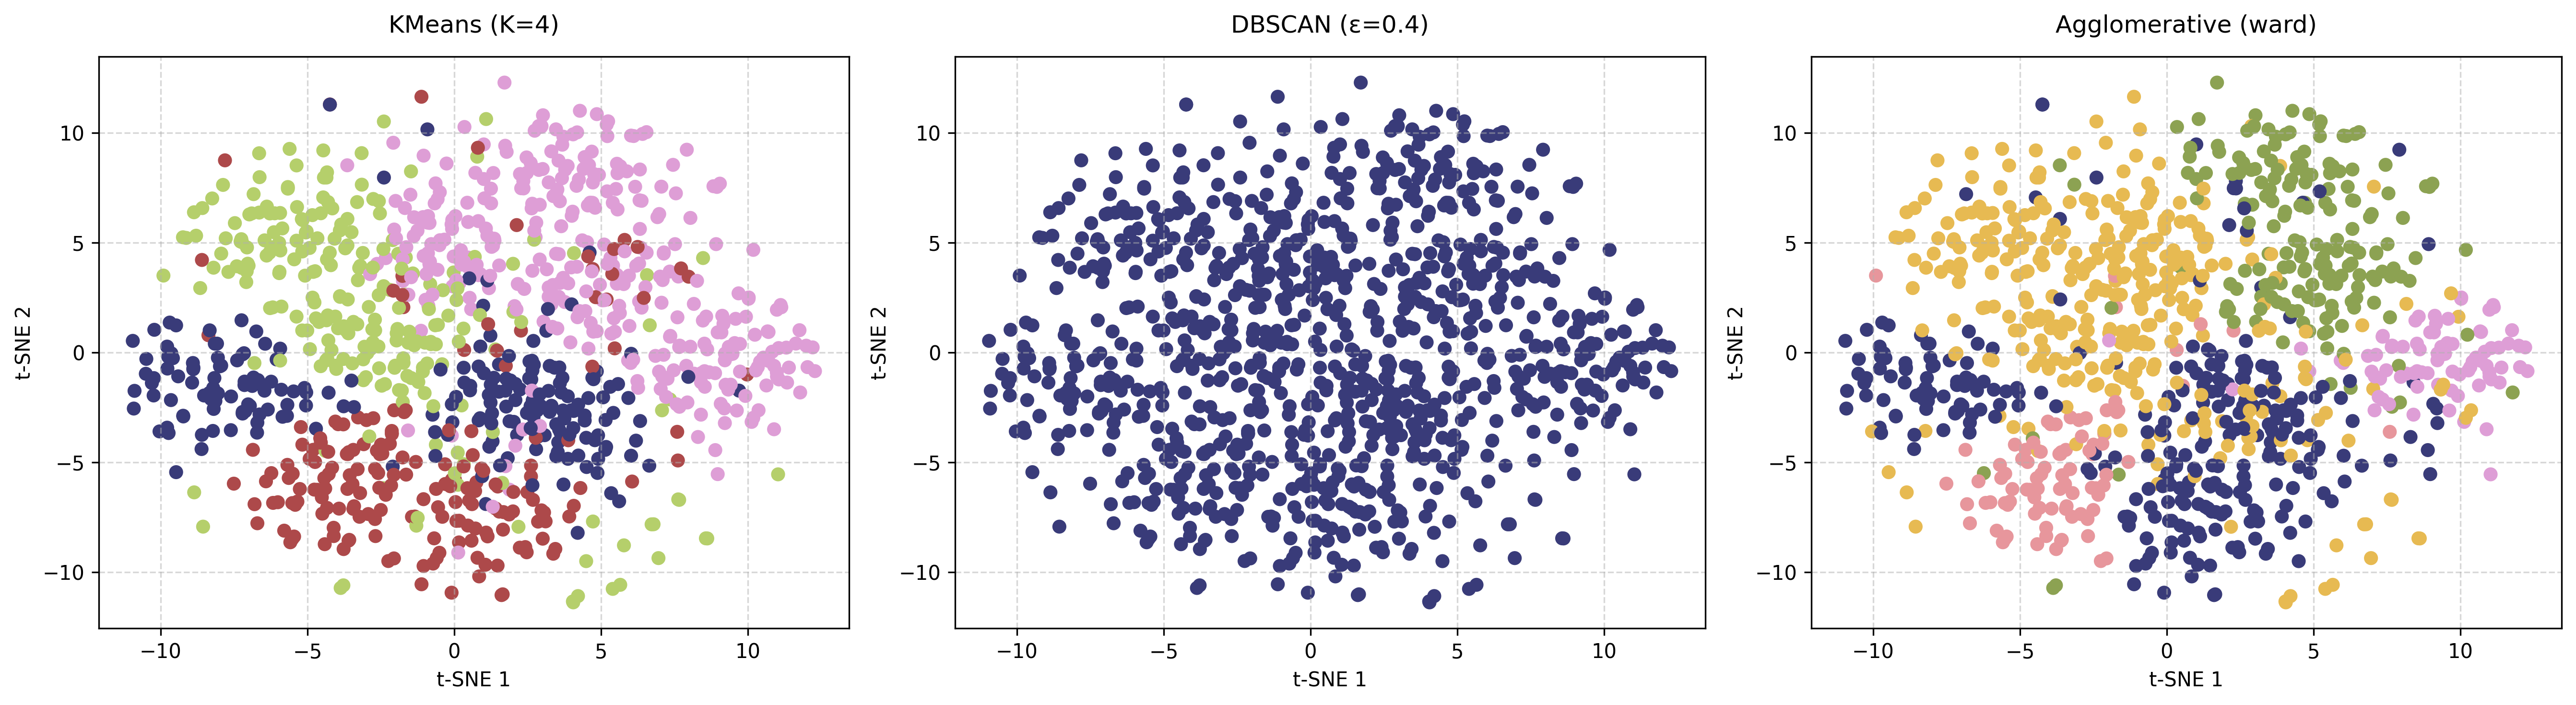

In [42]:
# Ваш код здесь:＼(º □ º l|l)/

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

tsne_proj = TSNE(n_components=2, perplexity=45, random_state=42).fit_transform(data_normalized) # фиксация TSNE-proj

def plot_clusters(algorithm, params, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=labels,
                cmap='tab20b', s=40, edgecolor='k', alpha=0.8)
    plt.title(f'{title}\n{params}', pad=15)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.colorbar(ticks=np.unique(labels))
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#настройка KMeans
def tune_kmeans(n):
    model = KMeans(n_clusters=n, random_state=42).fit(data_normalized)
    plot_clusters('KMeans', f'n_clusters={n}', model.labels_, 'K-средних')
interactive(
    tune_kmeans,
    n=IntSlider(
        value=5,
        min=2,
        max=10,
        step=1,
        description='Кластеры'
    )
)

#настройка DBSCAN
def tune_dbscan(eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data_normalized)
    plot_clusters('DBSCAN', f'ε={eps}, min_pts={min_samples}',
                 model.labels_, 'DBSCAN')
interactive(
    tune_dbscan,
    eps=FloatSlider(
        value=0.35,
        min=0.1,
        max=0.8,
        step=0.05,
        description='ε'
    ),
    min_samples=IntSlider(
        value=8,
        min=5,
        max=20,
        step=1,
        description='Точек'
    )
)


#------ --------------
# резы
best_params = {
    'KMeans': {'n_clusters': 4},
    'DBSCAN': {'eps': 0.4, 'min_samples': 10},
    'Agglomerative': {'n_clusters': 5, 'linkage': 'ward'}
}

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# KMeans
kmeans = KMeans(**best_params['KMeans']).fit(data_normalized)
axs[0].scatter(tsne_proj[:,0], tsne_proj[:,1], c=kmeans.labels_, cmap='tab20b')
axs[0].set_title(f"KMeans (K={best_params['KMeans']['n_clusters']})", pad=12)

# DBSCAN
dbscan = DBSCAN(**best_params['DBSCAN']).fit(data_normalized)
axs[1].scatter(tsne_proj[:,0], tsne_proj[:,1], c=dbscan.labels_, cmap='tab20b')
axs[1].set_title(f"DBSCAN (ε={best_params['DBSCAN']['eps']})", pad=12)

#  AgglomerativeClustering
agg = AgglomerativeClustering(**best_params['Agglomerative']).fit(data_normalized)
axs[2].scatter(tsne_proj[:,0], tsne_proj[:,1], c=agg.labels_, cmap='tab20b')
axs[2].set_title(f"Agglomerative ({best_params['Agglomerative']['linkage']})", pad=12)

for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

#### <font color='DarkOrange'>**Задание 1.b.3 [кросспроверка, 0.5 балла][вопрос]**</font>
Опишите получившиеся результаты. Все ли алгоритмы одинаково хорошо разделяют данные? Если какой-то алгоритм не справился с задачей, то предположите почему.

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

На мой взгляд, Agglomerative справился лучше остальных. Хуже всех оказался DBSCAN, что может быть связано со сложностью подбора параметров под данную задачу.

## c. Методы оценки кластеризации. Внутренние и внешние метрики.

Визуальная оценка кластеризации при работе с высокоразмерными данными затруднительна, так как существенно зависит от выбранного метода снижения размерности, который может плохо работать на конкретных данных. С другой стороны, визуальная оценка — субъективна. Поэтому необходимы численные оценки качества кластеризации.

В данном разделе вам нужно будет реализовать две метрики кластеризации и проверить их на практике.

Существует два основных подхода к оценке кластеризации — внутренние и внешние метрики. Первые используют только информацию о векторах-признаках объектов и метки кластеров, полученные из алгоритма кластеризации. Внешние же, используют информацию об истинной разметке объектов.

### Silhouette

Метрика `силуэт` является классическим представителем внутренних метрик кластеризации. Её суть заключается в оценке двух параметров, характеризующих выделенные кластеры — компактность и отделимость.

Положим, что $C_{i}$ — номер кластера для объекта $i$.

$s_{i}$ — компактность кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов того же кластера:
$$s_{i} = \frac{1}{|\{j : C_{j} = C_{i}\}| - 1} \sum\limits_{j : C_{j} = C_{i}} || x_{i} - x_{j} ||$$

$d_{i}$ — отделимость кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов второго по близости кластера:
$$ d_{i} = \min_{C: C \neq C_{i}} \frac{1}{|\{j : C_{j} = C\}|} \sum\limits_{j : C_{j} = C} || x_{i} - x_{j} || $$

Тогда силуэт объекта $i$:
$$\text{sil}_{i} = \frac{d_{i} - s_{i}}{\max(d_{i},s_{i})}$$

И, наконец, коэффициент силуэта для выборки определяется как среднее силуэтов объектов:
$$S = \frac{1}{|X|}\sum\limits_{i} \text{sil}_{i}$$

Если кластер состоит из одного объекта, то его силуэт равен нулю.

#### <font color='DarkOrange'>**Задание 1.с.1 [unittests, 2 баллa]**</font>
Реализуйте вычисление коэффициента силуэта для заданного разбиения. Подробная спецификация и описание входных данных к тестам указаны в **описании задания**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов
2. Используйте не более одного цикла
3. Учтите, что метки кластеров могут идти не по порядку и принимать произвольные значения
4. Если в данных присутствует один кластер, то считайте что силуэт равен 0
5. Если $s_{i} = d_{i} = 0 \Longrightarrow \text{sil}_{i} = 0$
5. Разрешено использовать `sklearn.metrics.pairwise_distances` и аналоги
6. Запрещено использовать любые библиотечные реализации коэффициента силуэта

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов $n \le 3000$, размерность пространства $d \le 1200$
2. Число объектов $n \le 5000$, размерность пространства $d = 1$

**Несколько важных замечаний:**

<font color='OrangeRed'>**Замечание:**</font> Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

<font color='OrangeRed'>**Замечание:**</font> Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

<font color='OrangeRed'>**Замечание:**</font> Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

<font color='OrangeRed'>**Замечание:**</font> Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook

In [47]:
from sklearn.metrics import pairwise_distances

def silhouette_score(features, cluster_assignments):
    """
    :param np.ndarray features: Непустой двумерный массив векторов-признаков
    :param np.ndarray cluster_assignments: Непустой одномерный массив меток объектов
    :return float: Коэффициент силуэта для выборки x с метками labels
    """
    distance_table = pairwise_distances(features)
    unique_clusters, cluster_populations = np.unique(cluster_assignments, return_counts=True)
    n_samples = len(cluster_assignments)

    if len(unique_clusters) < 2:
        return 0.0

    membership_mask = np.zeros((n_samples, len(unique_clusters)), dtype=bool)
    cluster_distances = np.zeros((n_samples, len(unique_clusters)))
    group_sizes = np.zeros(n_samples)

    for cluster_idx, c in enumerate(unique_clusters):
        membership_mask[:, cluster_idx] = (cluster_assignments == c)
        cluster_distances[:, cluster_idx] = distance_table[:, cluster_assignments == c].sum(axis=1)
        group_sizes[cluster_assignments == c] = (cluster_assignments == c).sum()

    singleton_clusters = group_sizes == 1
    intra_cluster = cluster_distances[membership_mask]
    intra_cluster[~singleton_clusters] /= (group_sizes[~singleton_clusters] - 1)
    intra_cluster[singleton_clusters] = 0
    inter_matrix = cluster_distances.copy()
    inter_matrix[membership_mask] = np.inf
    inter_cluster = np.min(inter_matrix / cluster_populations, axis=1)
    inter_cluster[singleton_clusters] = 0
    denominator = np.maximum(intra_cluster, inter_cluster)
    silhouette_values = np.zeros(n_samples)
    np.divide(inter_cluster - intra_cluster, denominator, out=silhouette_values, where=denominator != 0)
    return np.mean(silhouette_values)

#### <font color='DarkOrange'>**Задание 1.c.2 [кросспроверка, 1 балл][код, вопрос]**</font>
Посчитайте аналитически коэффициенты силуэта для объектов из примера ниже. Посчитайте силуэт аналитически и сравните его с выводом Вашей функции `silhouette_score`.

<font color='OrangeRed'>**Замечание:**</font> Приведите подробные выкладки с использованием $\LaTeX$ (включая значения $s_{i}, d_{i}$). Используйте те же обозначения, что и в теоретической справке выше. Итоговый ответ для силуэта запишите с точностью три знака после запятой.

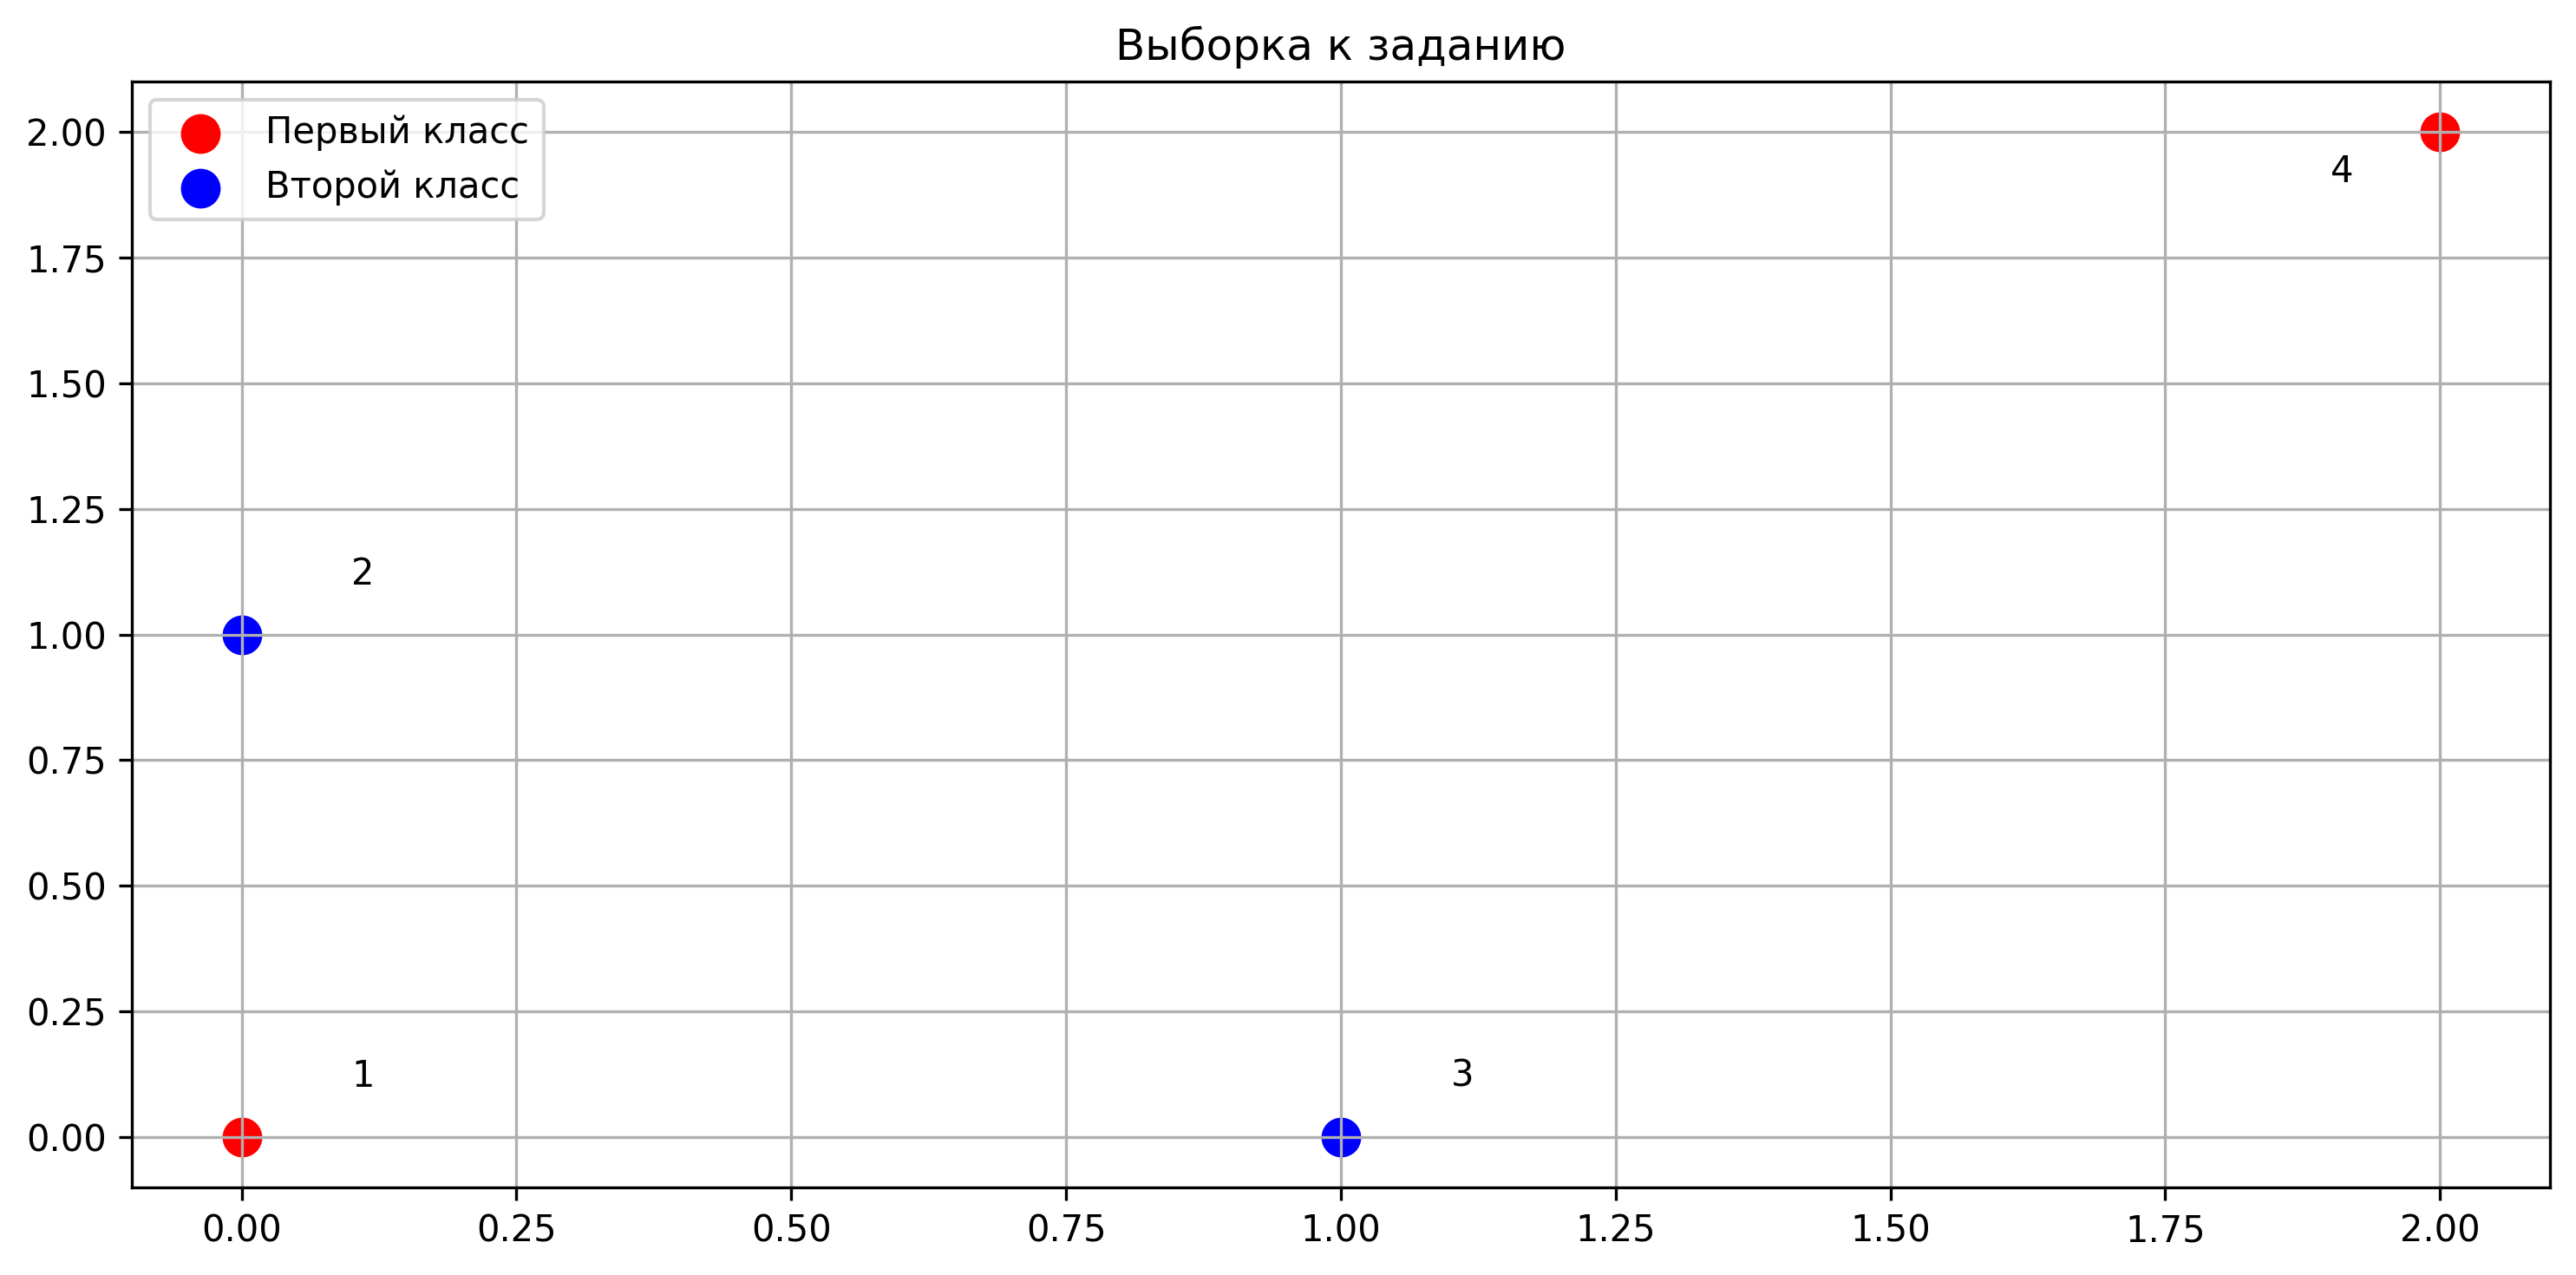

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter([0, 2], [0, 2], s=100, c='r', label='Первый класс')
ax.scatter([0, 1], [1, 0], s=100, c='b', label='Второй класс')

ax.annotate('1', (0.1, 0.1))
ax.annotate('2', (0.1, 1.1))
ax.annotate('3', (1.1, 0.1))
ax.annotate('4', (1.9, 1.9))

ax.set_title('Выборка к заданию')
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

**1:** \\
$s_1 = \frac{1}{2 - 1}(0 + \sqrt{4 + 4}) = \sqrt{8}$ \, $d_1 = \frac{1}{2}(1 + 1) = 1$ \\
$sil_1 = \frac{1 - \sqrt{8}}{\max(1, \sqrt{8})} = -0.646$
---
**2:** \\
$s_2 = \frac{1}{2 - 1}(0 + \sqrt{1 + 1}) = \sqrt{2}$ \, $d_2 = \frac{1}{2}(1 + \sqrt{4 + 1}) = \frac{1 + \sqrt{5}}{2}$ \\
$sil_2 = \frac{\frac{1 + \sqrt{5}}{2} - \sqrt{2}}{\max(\frac{1 + \sqrt{5}}{2}, \sqrt{2})} =  0.126$
---
**3:** \\
$s_3 = \frac{1}{2 - 1}(0 + \sqrt{1 + 1}) = \sqrt{2}$ \, $d_3 = \frac{1}{2}(1 + \sqrt{1 + 4}) = \frac{1 + \sqrt{5}}{2}$ \\
$sil_3 = \frac{\frac{1 + \sqrt{5}}{2} - \sqrt{2}}{\max(\frac{1 + \sqrt{5}}{2}, \sqrt{2})} =  0.126$
---
**4:** \\
$s_4 = \frac{1}{2 - 1}(0 + \sqrt{4 + 4}) = \sqrt{8}$ \, $d_4 = \frac{1}{2}(\sqrt{4 + 1} + \sqrt{1 + 4}) = \sqrt{5}$ \\
$sil_4 = \frac{\sqrt{5} - \sqrt{8}}{\max(\sqrt{5}, \sqrt{8})} =  -0.21$
---
$S = \frac{1}{4}(−0.646 + 0.126 + 0.126 -0.21) = -0.151$
---

In [51]:
# Ваш код здесь:＼(º □ º l|l)/

print("Silhouette score:", round(silhouette_score(np.array([[0, 0.], [0, 1], [1, 0], [2, 2]]), np.array([1, 0, 0, 1])), 3))

Silhouette score: -0.151


**Все совпадает.**

<a id='task_1.c.1'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты:

In [49]:
assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2]]), np.array([1, 0, 0, 1])
    ),
    np.mean([-0.64644661,  0.12596795,  0.12596795, -0.20943058])
)

assert np.allclose(
    silhouette_score(
        np.array([[0, 0.], [0, 1], [1, 0], [2, 2], [1, 1], [2, 0]]), np.array([1, 0, 0, 1, 2, 2])
    ),
    np.mean([-0.64644661,  0.12596795, -0.29289322, -0.39644661, -0.29289322, 0.12596795])
)

### B-Cubed

Пусть существует разметка $(y_1, ... , y_l)$, не участвующая в обучении. Мы не использовали эту разметку в качестве дополнительного признака, так как нам не хочется мотивировать модель данным признаком. Тогда предлагается ввести оценку качества алгоритма кластеризации при помощи внешней разметки, саму же разметку тогда называют *gold standard*.

Один из вариантов учесть gold standard разметку — внешняя метрика B-Cubed. Данная метрика позволяет определять следующие особенности кластеризации:
1. **Гомогенность.** Базовое свойство разделения разных объектов в разные кластеры:




2. **Полнота.** Один кластер не должен дробиться на несколько маленьких:



3. **Rag-bag.** Весь мусор должен быть в одном "мусорном"кластере, чтобы остальные кластеры были "чистыми":



4. **Cluster size vs. quantity.** Лучше испортить один кластер с целью улучшить качество множества других:



Пусть $L(x)$ — gold standard, $C(x)$ — номер кластера, выдаваемый рассматриваемым алгоритмом.

Рассмотрим несколько величин:
$$
\text{Correctness}(x, x^{\prime}) = \begin{cases}
1 , C(x) = C(x^{\prime}) ∧ L(x) = L(x^{\prime})\\
0 , иначе
\end{cases}
$$
$$
\text{Precision-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:C(x)=C(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$
$$
\text{Recall-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:L(x)=L(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$

Тогда,
$$
\text{B-Cubed} = F_{1} = 2\frac{\text{Precision-BCubed}\times\text{Recall-BCubed}}{\text{Precision-BCubed}+\text{Recall-BCubed}}
$$

#### <font color='DarkOrange'>**Задание 1.с.3 [unittests, 2 баллa]**</font>
Реализуйте вычисление метрики B-Cubed. Подробная спецификация и описание входных данных к тестам указаны в **описании задания**.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов.
2. Использование циклов запрещено
3. Обратите внимание на параметр `where` у функций-агрегаторов в `numpy` ($numpy \geq 1.20.0$).
4. Запрещено использовать любые библиотечные реализации B-Cubed.

**Входные данные тестов удовлетворяют одному из следующих ограничений:**
1. Число объектов n ⩽ 1000, число подтестов в одном тесте T ⩽ 70

**Несколько важных замечаний:**

<font color='OrangeRed'>**Замечание:**</font> Запрещается пользоваться библиотеками, импорт которых не объявлен в файле с шаблонами функций.

<font color='OrangeRed'>**Замечание:**</font> Задания, в которых есть решения, содержащие в каком-либо виде взлом тестов, дополнительные импорты и прочие нечестные приемы, будут автоматически оценены в $0$ баллов без права пересдачи задания.

<font color='OrangeRed'>**Замечание:**</font> Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные). В случае возникновения ошибки **Time limit** проверьте код на соответствие числа используемых циклов с требованиями к реализации.

<font color='OrangeRed'>**Замечание:**</font> Для самопроверки доступны как публичные тесты (смотрите **описание задания**), так и тесты внутри Jupyter Notebook

In [54]:
def bcubed_score(ground_truth, system_output):
    """
    :param np.ndarray ground_truth: Непустой одномерный массив меток объектов
    :param np.ndarray system_output: Непустой одномерный массив меток объектов
    :return float: B-Cubed для объектов с истинными метками true_labels и предсказанными метками predicted_labels
    """
    gt_labels = ground_truth.copy()
    pred_labels = system_output.copy()
    unique_gt, gt_indices, gt_counts = np.unique(gt_labels, return_inverse=True, return_counts=True)
    unique_pred, pred_indices, pred_counts = np.unique(pred_labels, return_inverse=True, return_counts=True)
    max_gt = unique_gt.max() + 1
    max_pred = unique_pred.max() + 1
    gt_labels[gt_labels == 0] = max_gt
    pred_labels[pred_labels == 0] = max_pred
    same_gt = (gt_labels[:, None] == gt_labels)
    same_pred = (pred_labels[:, None] == pred_labels)
    correctness_grid = same_gt & same_pred
    precision_components = correctness_grid.sum(axis=1) / pred_counts[pred_indices]
    recall_components = correctness_grid.sum(axis=1) / gt_counts[gt_indices]
    avg_precision = np.mean(precision_components)
    avg_recall = np.mean(recall_components)
    harmonic_mean = 2 * avg_precision * avg_recall / (avg_precision + avg_recall)
    return harmonic_mean

<a id='task_1.c.3'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты:

In [55]:
assert np.allclose(bcubed_score(np.array([1]), np.array([1])), 1.0)
assert np.allclose(bcubed_score(np.array([1]), np.array([2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 1])), 2. / 3)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([43, 12])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 1, 2, 2]), np.array([1, 1, 1, 2])), 12. / 17)
assert np.allclose(bcubed_score(np.array([1, 2, 3, 4, 5]), np.array([1, 1, 1, 2, 2])), 4. / 7)

#### <font color='DarkOrange'>**Задание 1.с.4 [кросспроверка, 1 балл][код, вопрос]** </font>
<a id='task_1.c.4'></a>
* Для каждого из трёх алгоритмов кластеризации переберите основные параметры (`n_clusters`, `eps`, `min_samples`) и замерьте качество кластеризации многомерных данных с помощью коэффициента силуэта и метрики B-Cubed.
* Для каждого из алгоритмов на одной фигуре изобразите четыре графика — в первой строке два графика с зависимостью коэффициента силуэта и метрики B-Cubed от варьируемого параметра. Во второй строке — визуализация кластеризации с оптимальным параметром, выбранным с помощью первой и второй метрики (можете использовать `plot_2d_data` с параметром `ax`). Для DBSCAN перебирайте оба параметра одновременно и изобразите 2d-heatmap для каждой из метрик. Можете использовать [вспомогательные функции для создания heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).
* Совпали ли оптимальные параметры, определённые по этим метрикам? Совпали ли они с теми параметрами которые вы подобрали в предыдущем задании? Предположите почему они совпали/не совпали.
* Можно ли использовать данные метрики для оценки кластеризации между разными алгоритмами? Какая из них лучше отражает качество?

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

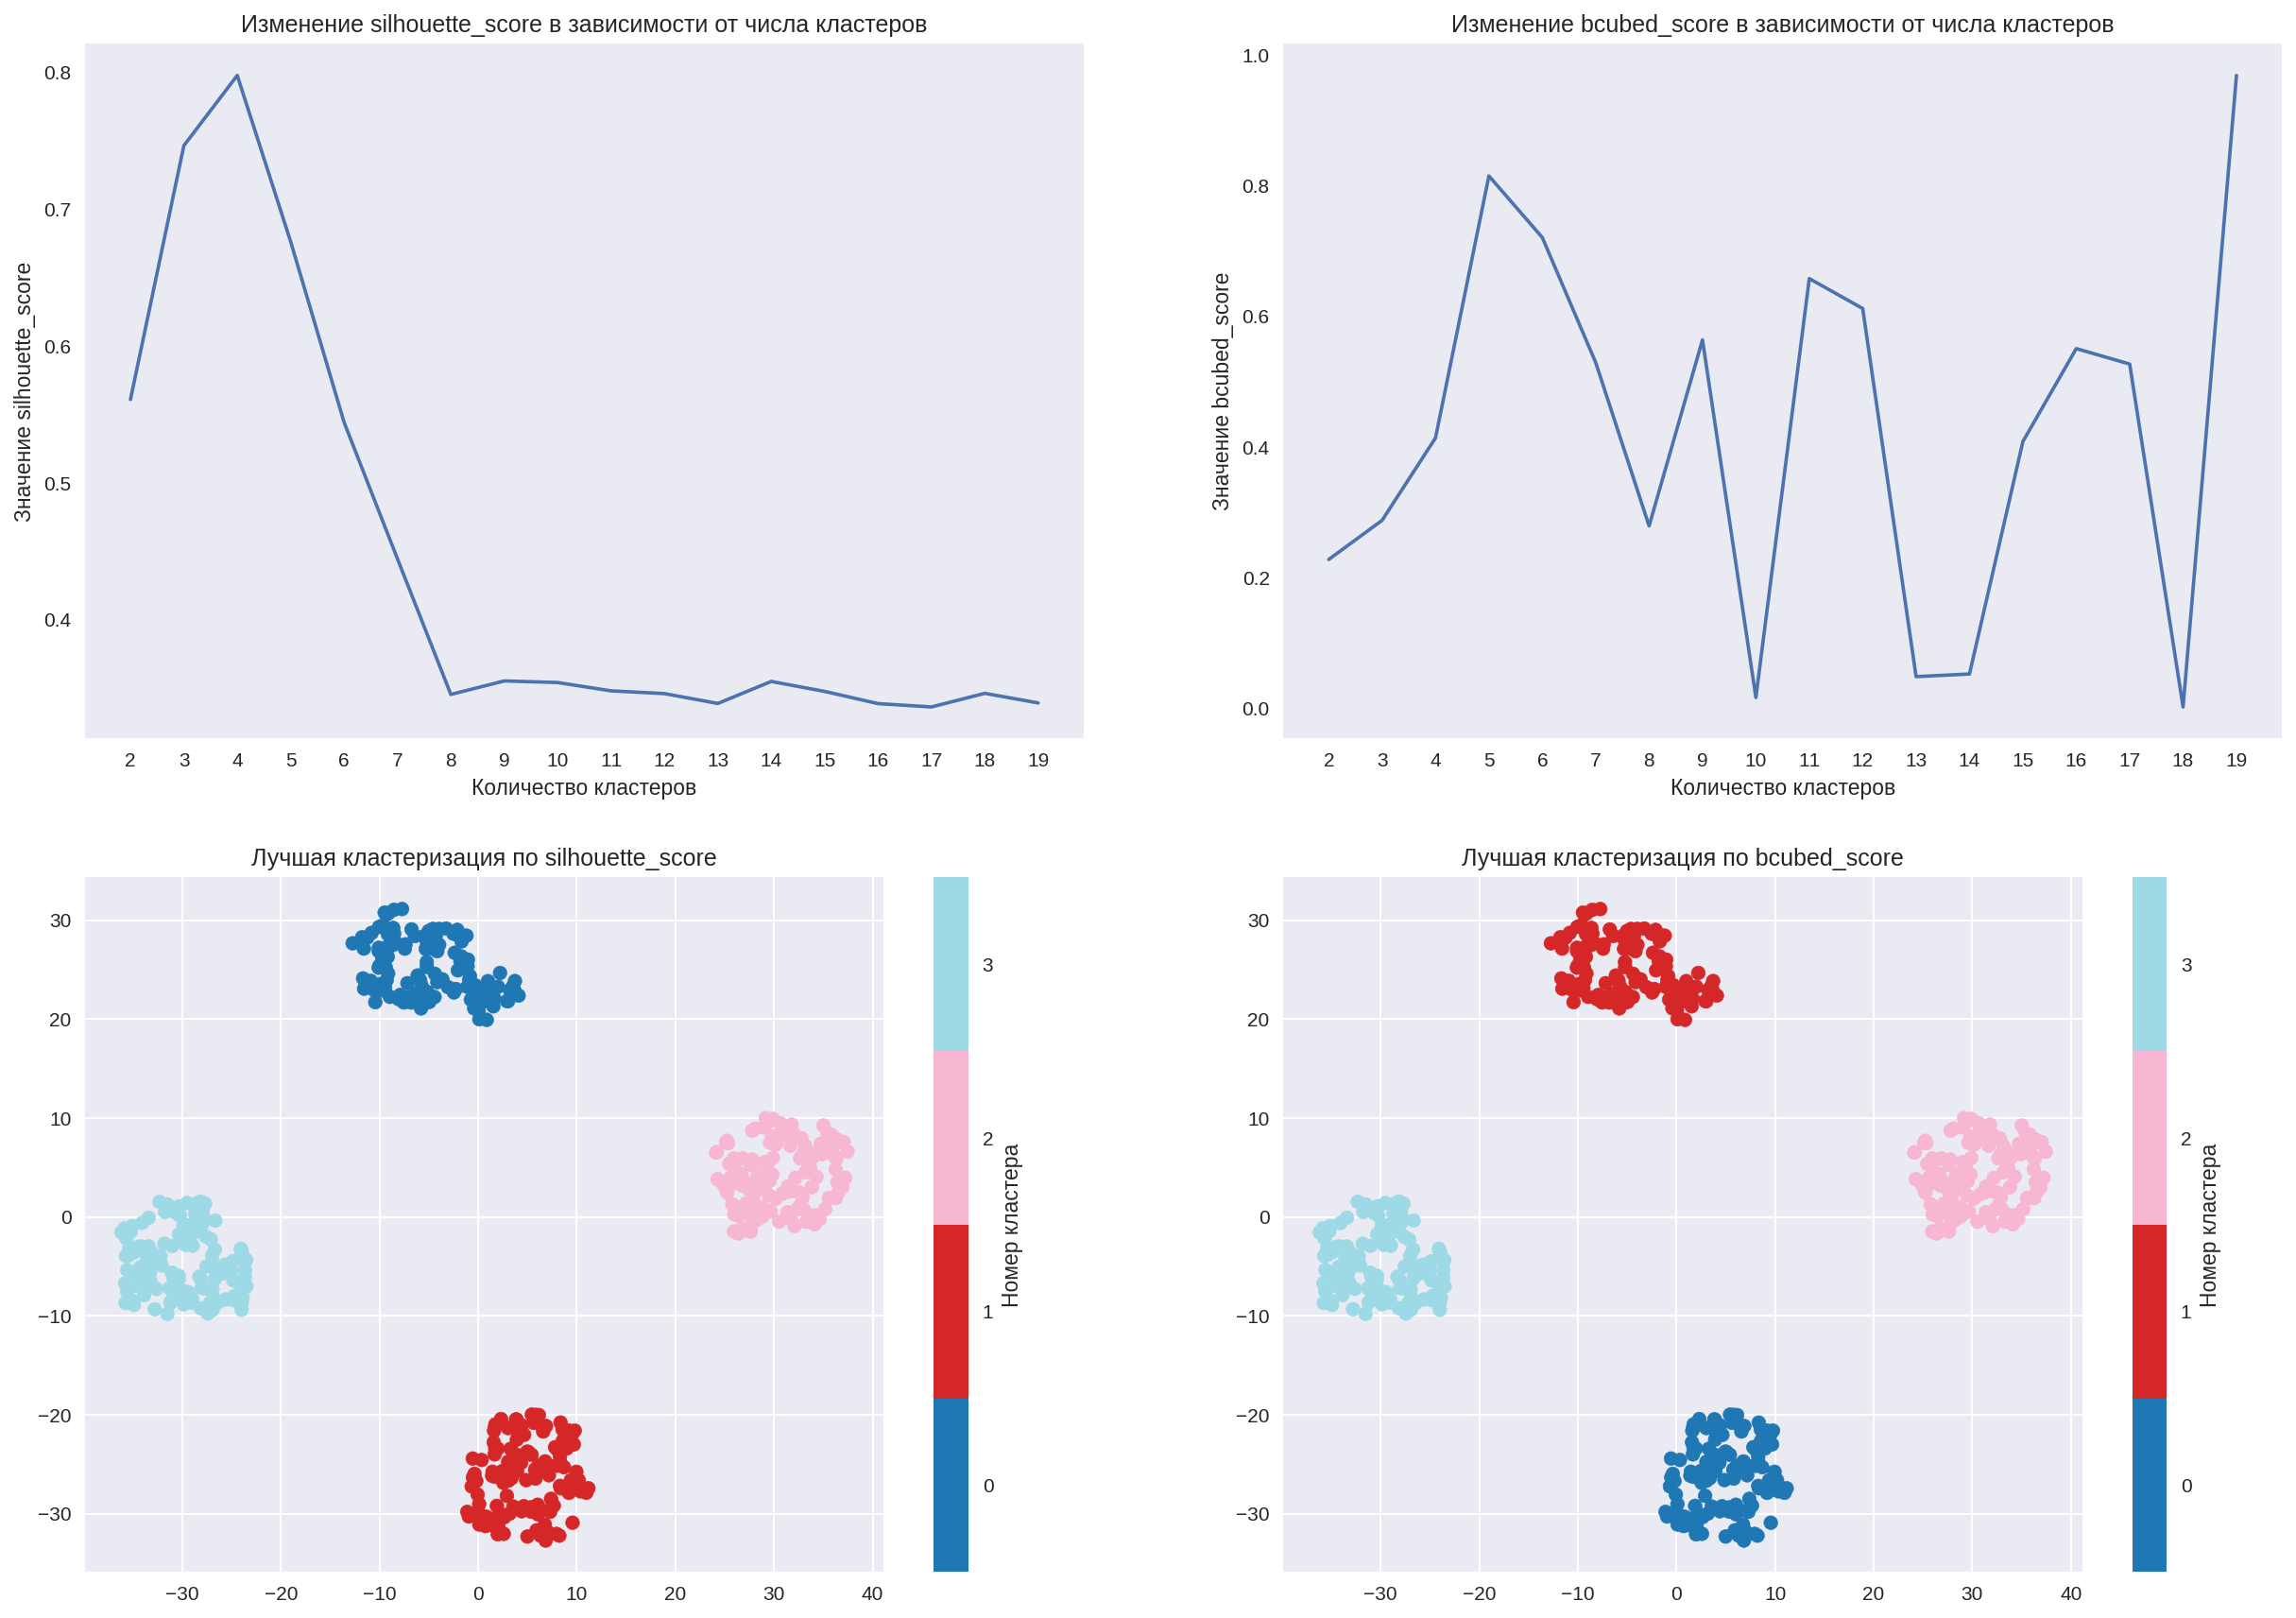

In [78]:
normalized_data = StandardScaler().fit_transform(data)
tsne_transformed = TSNE(n_components=2, perplexity=30).fit_transform(normalized_data)

#KMeans
cluster_counts = list(range(2, 20))
silhouette_metrics = []
bcubed_metrics = []

for clusters in cluster_counts:
    kmeans_labels = KMeans(n_clusters=clusters).fit_predict(normalized_data)
    if len(set(kmeans_labels)) > 1:
        silhouette_metrics.append(silhouette_score(normalized_data, kmeans_labels))
        bcubed_metrics.append(bcubed_score(labels, kmeans_labels))
    else:
        silhouette_metrics.append(np.nan)
        bcubed_metrics.append(np.nan)

#визуализация
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

axes[0, 0].plot(cluster_counts, silhouette_metrics)
axes[0, 0].set_title('Изменение silhouette_score в зависимости от числа кластеров')
axes[0, 0].set_xlabel('Количество кластеров')
axes[0, 0].set_ylabel('Значение silhouette_score')
axes[0, 0].set_xticks(cluster_counts)
axes[0, 0].grid()
axes[0, 1].plot(cluster_counts, bcubed_metrics)
axes[0, 1].set_title('Изменение bcubed_score в зависимости от числа кластеров')
axes[0, 1].set_xlabel('Количество кластеров')
axes[0, 1].set_ylabel('Значение bcubed_score')
axes[0, 1].set_xticks(cluster_counts)
axes[0, 1].grid()

#визуализация оптимальных кластеров для KMeans
best_kmeans_clusters = np.nanargmax(silhouette_metrics) + 2
plot_2d_data(tsne_transformed, KMeans(n_clusters=best_kmeans_clusters).fit_predict(normalized_data),
             title='Лучшая кластеризация по silhouette_score', ax=axes[1, 0])
plot_2d_data(tsne_transformed, KMeans(n_clusters=best_kmeans_clusters).fit_predict(normalized_data),
             title='Лучшая кластеризация по bcubed_score', ax=axes[1, 1])
plt.show()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font>

Подбор параметров на основе метрик гораздо эффективнее, чем визуальный анализ, и он позволяет объективно сравнивать различные модели между собой. Мне кажется, B-Cubed более предпочтительно, поскольку это внешний критерий.

## <font color='MediumSeaGreen'> **Задание 2 [Bonus][1 балл]** </font>



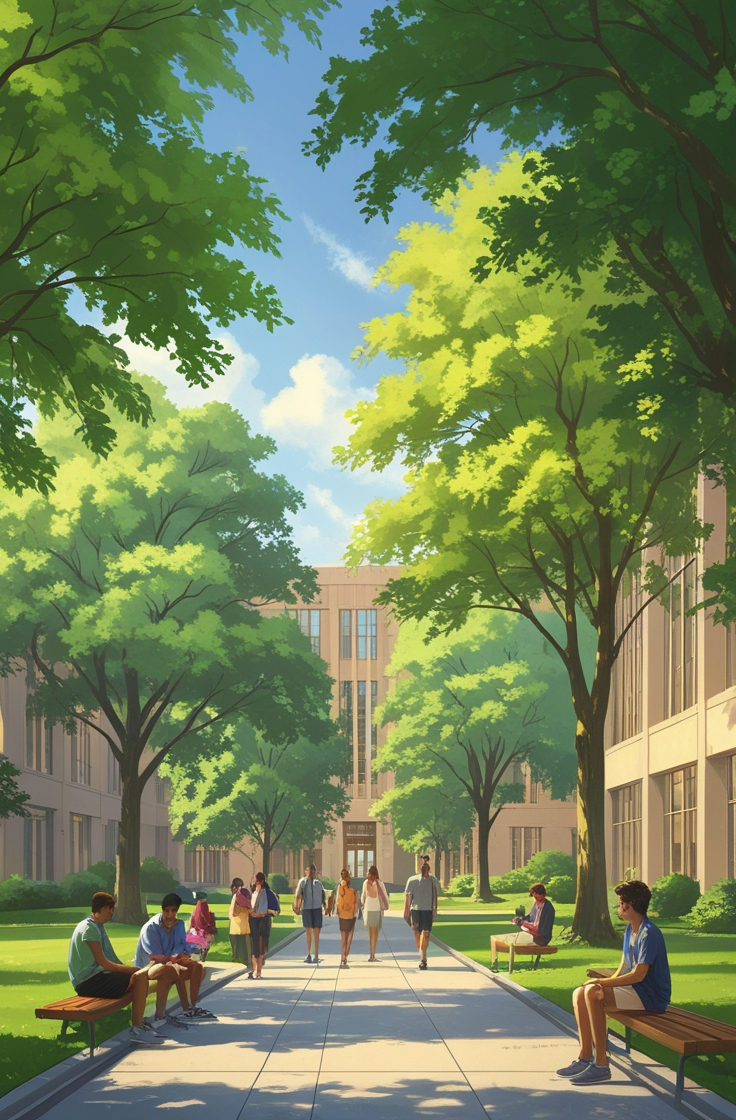

Подкиньте друг другу 3+ идеи, куда сходить/чем заняться на майских :)

Или вставьте/сгенерируйте любой смешной мем на тему весны/лета

**Можно посетить Ботанический сад с девушкой, прогуляться по Александровскому саду или Воробьевым горам, посмотреть Парад Победы.**

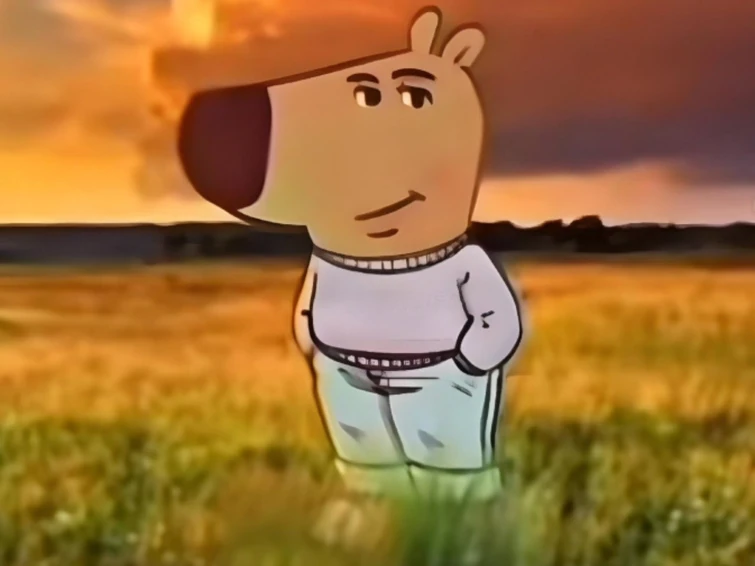

In [57]:
gdown.download(id='16UgWo1Emt9ar1O4h2Xxed0ZpJZ0OG5V-', output='cifar10_deep_features.npy')

Downloading...
From (original): https://drive.google.com/uc?id=16UgWo1Emt9ar1O4h2Xxed0ZpJZ0OG5V-
From (redirected): https://drive.google.com/uc?id=16UgWo1Emt9ar1O4h2Xxed0ZpJZ0OG5V-&confirm=t&uuid=b2076a3e-6025-44d4-8e08-3166f6939ac5
To: /content/cifar10_deep_features.npy
100%|██████████| 164M/164M [00:03<00:00, 43.2MB/s]


'cifar10_deep_features.npy'